In [1]:
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
import os
# Text Processing
import re
from collections import Counter
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
DATA_DIR = "."
MBTI_RAW_CSV_PATH = os.path.join(DATA_DIR, "newPersonalityDataset2.csv")

MBTI_DS = pd.read_csv(MBTI_RAW_CSV_PATH)

### Data visualization

In [2]:
types = np.unique(np.array(MBTI_DS['type']))
print("The Unique values 'type' of personality column",types)
total = MBTI_DS.groupby(['type']).count()
print("The Total Posts for every Personality Type")
total

The Unique values 'type' of personality column ['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']
The Total Posts for every Personality Type


,idx,first,second,third,fourth,posts
type,,,,,,
ENFJ,149,149,149,149,149,149
ENFP,549,549,549,549,549,549
ENTJ,184,184,184,184,184,184
ENTP,536,536,536,536,536,536
ESFJ,30,30,30,30,30,30
ESFP,40,40,40,40,40,40
ESTJ,31,31,31,31,31,31
ESTP,72,72,72,72,72,72
INFJ,1191,1191,1191,1191,1191,1191


Text(0.5, 1.0, 'Total post each personality type')

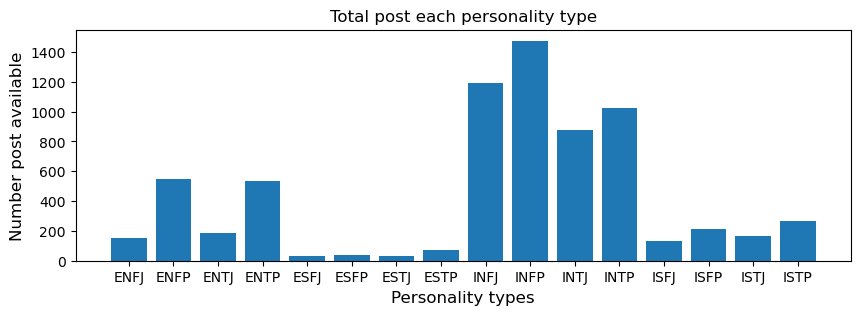

In [3]:
plt.figure(figsize = (10,3))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number post available', size = 12)
plt.title('Total post each personality type')

In [4]:
# MBTI_TO_FREQUENCY_DICT = {
#     "ISTJ": 0.11,
#     "ISFJ": 0.09,
#     "INFJ": 0.04,
#     "INTJ": 0.05,
#     "ISTP": 0.05,
#     "ISFP": 0.05,
#     "INFP": 0.06,
#     "INTP": 0.06,
#     "ESTP": 0.04,
#     "ESFP": 0.04,
#     "ENFP": 0.08,
#     "ENTP": 0.06,
#     "ESTJ": 0.08,
#     "ESFJ": 0.09,
#     "ENFJ": 0.05,
#     "ENTJ": 0.05,
# }


### Data Preprocessing

In [5]:
MBTI_DS['posts'] = MBTI_DS['posts'].str.lower()
MBTI_DS



,idx,type,first,second,third,fourth,posts
0,0,ENFP,E,N,F,P,'i like that you are kind as infj i find that...
1,1,INFJ,I,N,F,J,'^ oh my you are right. who really talks like ...
2,2,INFP,I,N,F,P,'yep yep yep especially the last one. ye...
3,3,INFJ,I,N,F,J,'things that are generalizable to the entire p...
4,4,INTJ,I,N,T,J,'work: student. hobbies: studying gaming r...
...,...,...,...,...,...,...,...
6935,6935,INFJ,I,N,F,J,'well mostly i don't like avocado. but the p...
6936,6936,INFJ,I,N,F,J,'http://prikachi.com/images/801/8386801y.jpg h...
6937,6937,INFJ,I,N,F,J,'cigarettes are like hamsters. perfectly harml...
6938,6938,INTJ,I,N,T,J,'bookshelf porn|||as a non-american please ex...


In [6]:
def split_text(text):
    return text.strip("'").split('|||')


In [7]:
def join_strings(string_list, separator=' '):
    return separator.join(string_list)

#df['posts'] = df['posts'].apply(join_strings)
MBTI_DS

,idx,type,first,second,third,fourth,posts
0,0,ENFP,E,N,F,P,'i like that you are kind as infj i find that...
1,1,INFJ,I,N,F,J,'^ oh my you are right. who really talks like ...
2,2,INFP,I,N,F,P,'yep yep yep especially the last one. ye...
3,3,INFJ,I,N,F,J,'things that are generalizable to the entire p...
4,4,INTJ,I,N,T,J,'work: student. hobbies: studying gaming r...
...,...,...,...,...,...,...,...
6935,6935,INFJ,I,N,F,J,'well mostly i don't like avocado. but the p...
6936,6936,INFJ,I,N,F,J,'http://prikachi.com/images/801/8386801y.jpg h...
6937,6937,INFJ,I,N,F,J,'cigarettes are like hamsters. perfectly harml...
6938,6938,INTJ,I,N,T,J,'bookshelf porn|||as a non-american please ex...


In [8]:
MBTI_DS['posts'] = MBTI_DS['posts'].apply(split_text)
MBTI_DS

,idx,type,first,second,third,fourth,posts
0,0,ENFP,E,N,F,P,[i like that you are kind as infj i find that...
1,1,INFJ,I,N,F,J,[^ oh my you are right. who really talks like ...
2,2,INFP,I,N,F,P,[yep yep yep especially the last one. ye...
3,3,INFJ,I,N,F,J,[things that are generalizable to the entire p...
4,4,INTJ,I,N,T,J,[work: student. hobbies: studying gaming r...
...,...,...,...,...,...,...,...
6935,6935,INFJ,I,N,F,J,[well mostly i don't like avocado. but the p...
6936,6936,INFJ,I,N,F,J,[http://prikachi.com/images/801/8386801y.jpg h...
6937,6937,INFJ,I,N,F,J,[cigarettes are like hamsters. perfectly harml...
6938,6938,INTJ,I,N,T,J,"[bookshelf porn, as a non-american please exc..."


In [9]:
MBTI_DS['posts'] = MBTI_DS['posts'].apply(join_strings)
MBTI_DS

,idx,type,first,second,third,fourth,posts
0,0,ENFP,E,N,F,P,i like that you are kind as infj i find that ...
1,1,INFJ,I,N,F,J,^ oh my you are right. who really talks like t...
2,2,INFP,I,N,F,P,yep yep yep especially the last one. yep...
3,3,INFJ,I,N,F,J,things that are generalizable to the entire po...
4,4,INTJ,I,N,T,J,work: student. hobbies: studying gaming re...
...,...,...,...,...,...,...,...
6935,6935,INFJ,I,N,F,J,well mostly i don't like avocado. but the pr...
6936,6936,INFJ,I,N,F,J,http://prikachi.com/images/801/8386801y.jpg ht...
6937,6937,INFJ,I,N,F,J,cigarettes are like hamsters. perfectly harmle...
6938,6938,INTJ,I,N,T,J,bookshelf porn as a non-american please excus...


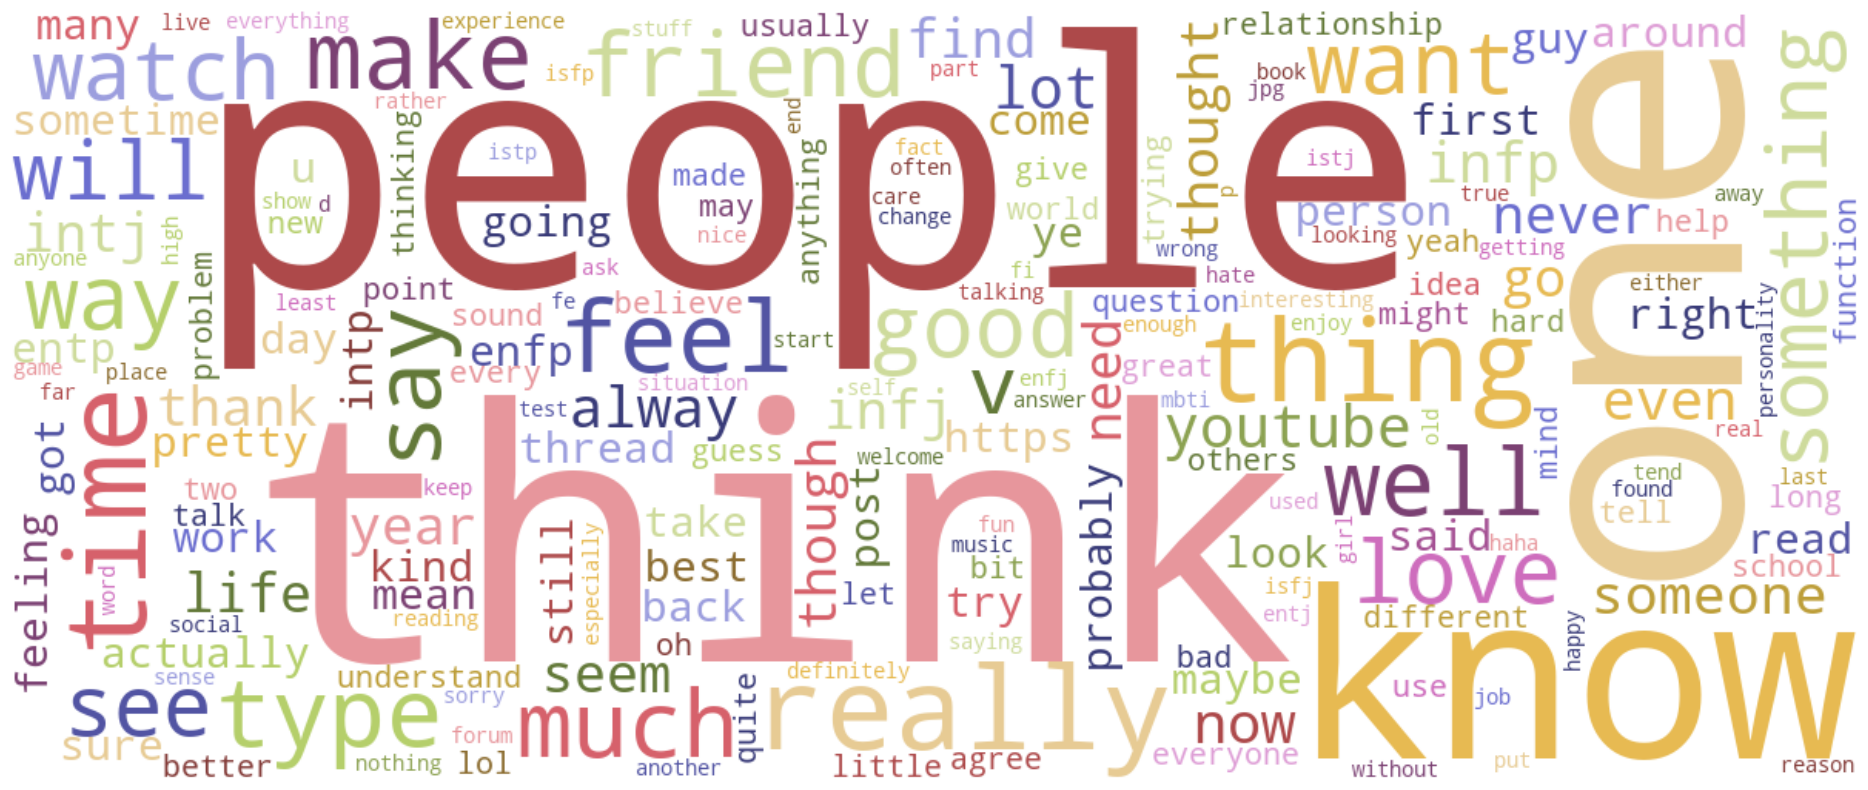

In [10]:
words = list(MBTI_DS["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)

wc = wordcloud.WordCloud(width=1200, height=500, collocations=False, background_color="white", colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

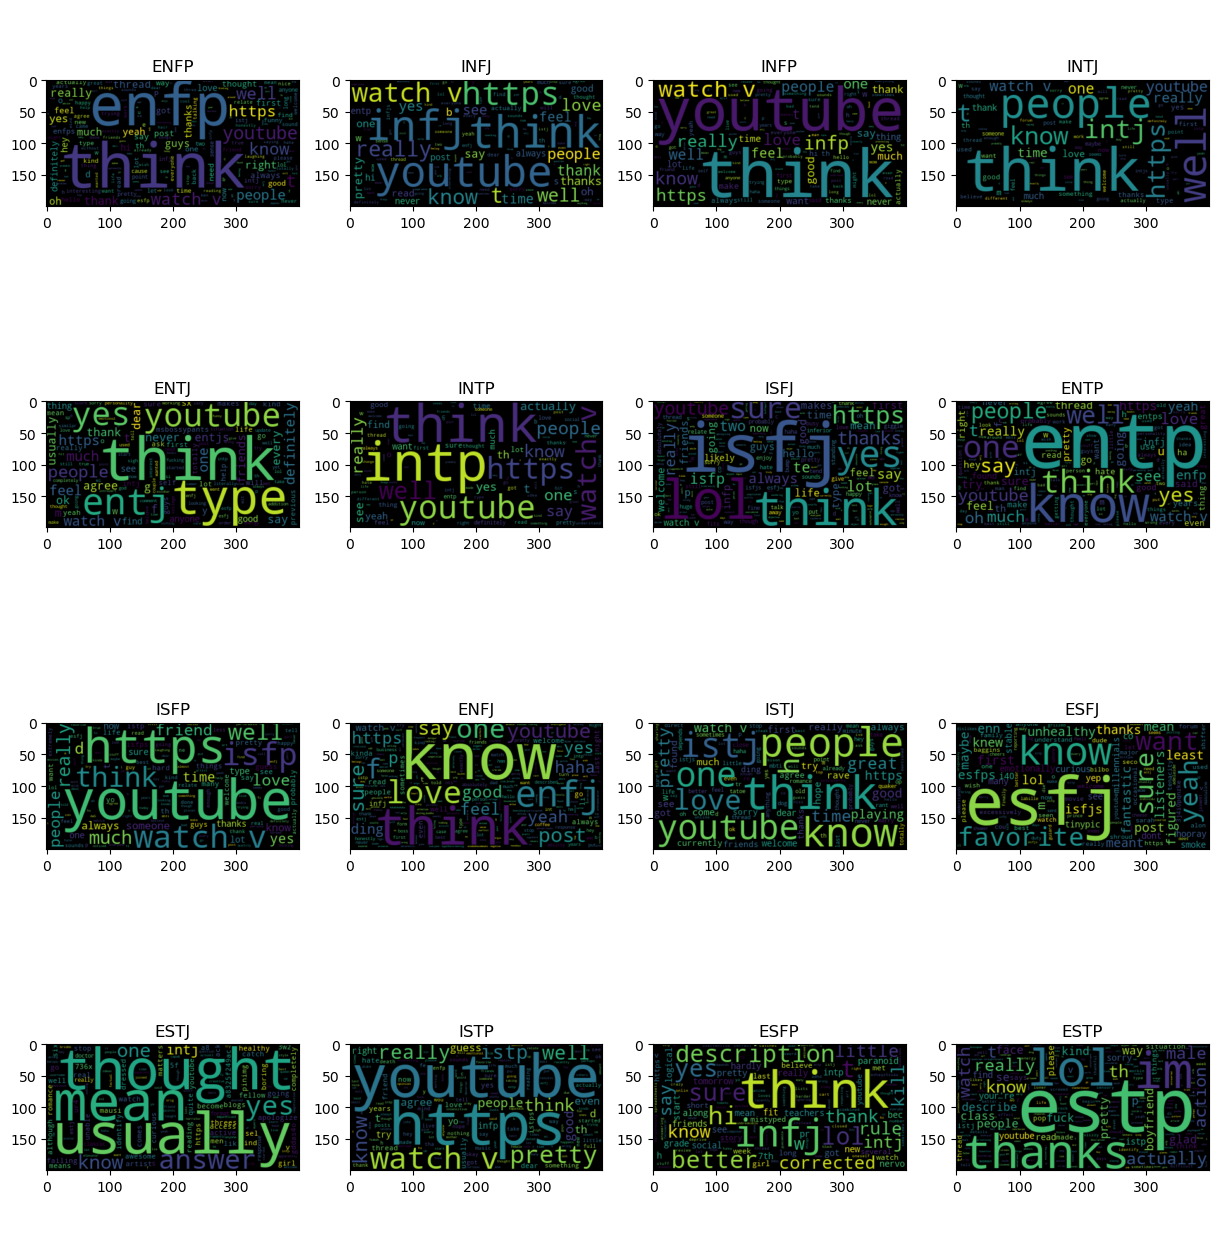

In [11]:
fig, ax = plt.subplots(len(MBTI_DS['type'].unique()), figsize=(15,len(MBTI_DS['type'].unique())))
k = 0
for i in MBTI_DS['type'].unique():
    df_4 = MBTI_DS[MBTI_DS['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [12]:
import nltk
nltk.download('stopwords')
lemmatiser = WordNetLemmatizer()
# Remove the stop words for speed 
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP','ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xinhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###### binary type

In [13]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 0
    elif t[0] == 'E': I = 1
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 0
    elif t[1] == 'S': N = 1
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 0
    elif t[3] == 'P': J = 1
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 
MBTI_DS_N = MBTI_DS.join(MBTI_DS.apply (lambda row: get_types (row),axis=1))
MBTI_DS_N.head(5)

,idx,type,first,second,third,fourth,posts,IE,NS,TF,JP
0,0,ENFP,E,N,F,P,i like that you are kind as infj i find that ...,1,0,0,1
1,1,INFJ,I,N,F,J,^ oh my you are right. who really talks like t...,0,0,0,0
2,2,INFP,I,N,F,P,yep yep yep especially the last one. yep...,0,0,0,1
3,3,INFJ,I,N,F,J,things that are generalizable to the entire po...,0,0,0,0
4,4,INTJ,I,N,T,J,work: student. hobbies: studying gaming re...,0,0,1,0


In [14]:
#Counting Number posts in one class | Total Number posts in other class

print ("Introversion (I) |  Extroversion (E): \t", MBTI_DS_N['IE'].value_counts()[0], " | ", MBTI_DS_N['IE'].value_counts()[1])
print ("Intuition    (N) |  Sensing      (S): \t", MBTI_DS_N['NS'].value_counts()[0], " | ", MBTI_DS_N['NS'].value_counts()[1])
print ("Thinking     (T) |  Feeling      (F): \t", MBTI_DS_N['TF'].value_counts()[0], " | ", MBTI_DS_N['TF'].value_counts()[1])
print ("Judging      (J) |  Perceiving   (P): \t", MBTI_DS_N['JP'].value_counts()[0], " | ", MBTI_DS_N['JP'].value_counts()[1])

Introversion (I) |  Extroversion (E): 	 5349  |  1591
Intuition    (N) |  Sensing      (S): 	 5988  |  952
Thinking     (T) |  Feeling      (F): 	 3781  |  3159
Judging      (J) |  Perceiving   (P): 	 2762  |  4178


In [15]:
# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # Transform MBTI to binary vector
    return [b_Pers[l] for l in personality]

#Show result output for personality prediction
def translate_back(personality):
    # transform binary vector to MBTI personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in MBTI_DS_N.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[1 0 0 1]
 [0 0 0 0]
 [0 0 0 1]
 ...
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]]


In [16]:
nltk.download('wordnet')
from nltk.tokenize import word_tokenize


def pre_process_text(MBTI_DS_N, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  len_MBTI_DS_N = len(MBTI_DS_N)
  i=0
  
  for row in MBTI_DS_N.iterrows():
      #Remove and clean comments
      posts = row[1].posts
      #Remove url links 
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

      
      #Remove Non-words - keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      #Remove stop words
   
      temp = " ".join([lemmatiser.lemmatize(w,'v') for w in temp.split(' ') if w not in useless_words])
  
          
      #Remove MBTI personality words from posts
      for t in unique_type_list:
        temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
      list_personality.append(type_labelized)
      # the cleaned data temp is passed here
      list_posts.append(temp)

  MBTI_DS_N['digitype'] = list_personality
  # returns the result
  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  #MBTI_DS_N['digitype'] = list_personality
  MBTI_DS_N['posts'] = list_posts
  return list_posts, list_personality

list_posts, list_personality  = pre_process_text(MBTI_DS_N, remove_stop_words=True, remove_mbti_profiles=True)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xinhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
print("Example :")
print("\nPost before preprocessing:\n\n", MBTI_DS_N.posts[46])
print("\nPost after preprocessing:\n\n", list_posts[46])

print("\nMBTI before preprocessing:\n\n", MBTI_DS_N.type[46])
print("\nMBTI after preprocessing:\n\n", list_personality[46])
print("\nMBTI after preprocessing:\n\n", MBTI_DS_N.digitype[46])

Example :

Post before preprocessing:

  best friends      dad  mom  sister  spite get along really really well previous  reason tend attract lot rather terrify small talk moment day outside wait bus home hour bus ride girl sit next start small talk like bite young online date right could see infinitely successful online date flounder real world hop kind could accomplish could find way head real world exactly happiness consist achieve kind path current usually listen music lyric lyric song seem relevant perfect right lol actually get lot mostly attract ton people need someone talk ramble something care good pretend probably  bad anything never find able find common grind ican teven hilariously bad music cannot possibly get awful kind make want cry little become sulky anti social bitch ordinary normally niceness come lot easier time month also say pretty tv pretty little liars desperate housewives teen mom pregnant america next top model glee pretty sure regain ton iq point stop watch t

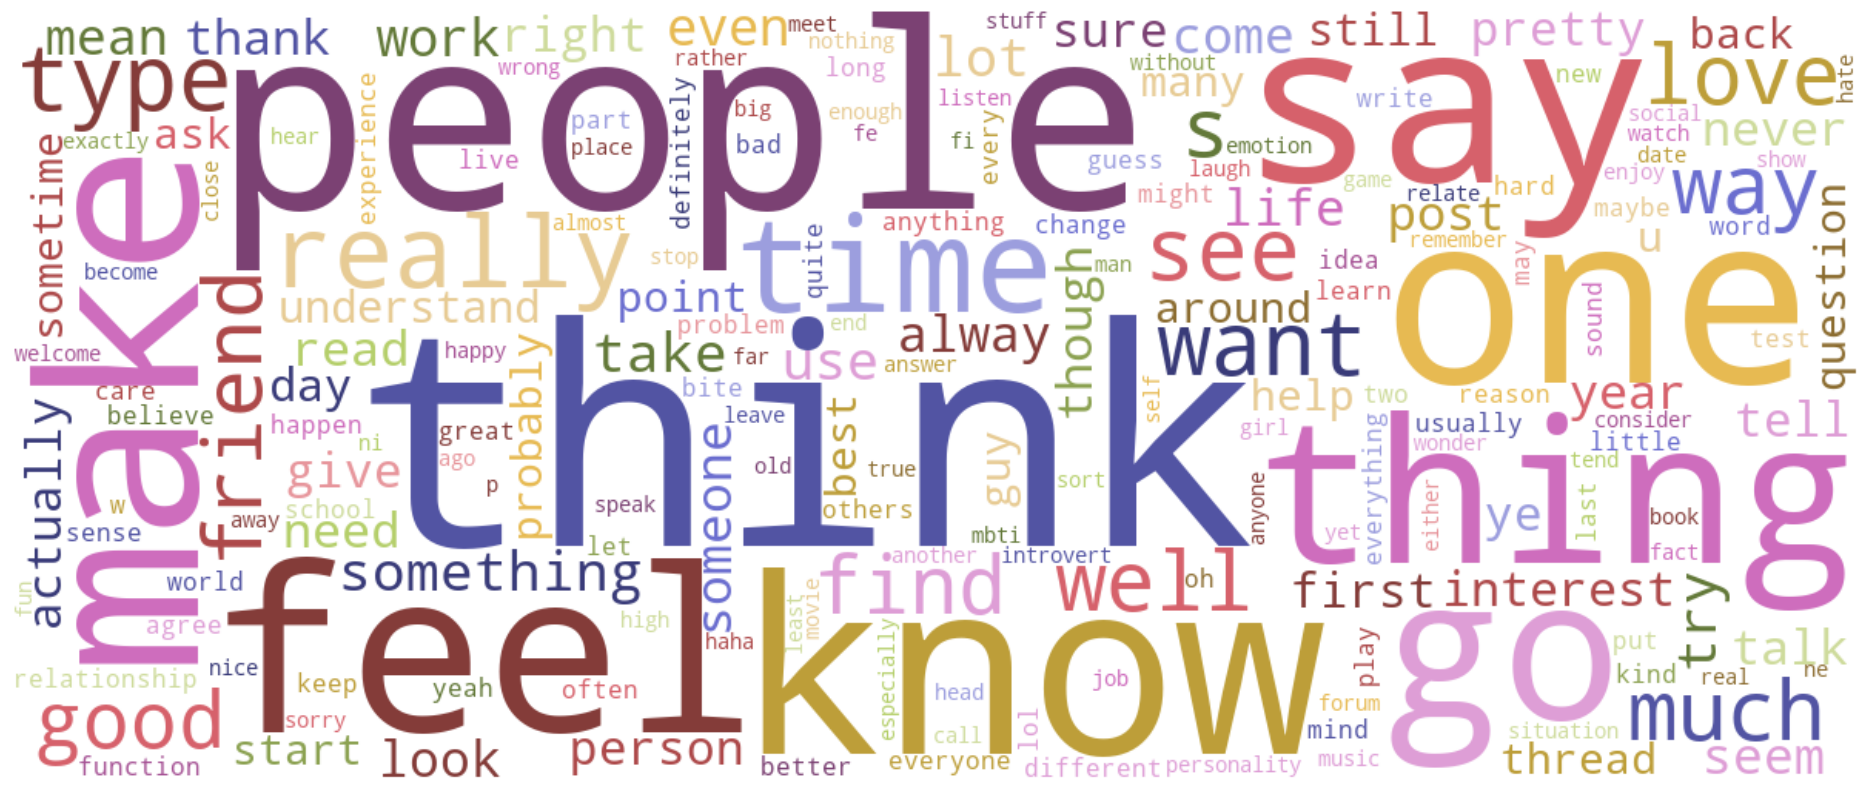

In [18]:
wc_N = WordCloud(width=1200, height=500, collocations=False, background_color="white", colormap="tab20b").generate(join_strings(list_posts))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc_N, interpolation='bilinear')
_ = plt.axis("off")

In [19]:
MBTI_DS_N.head(5)

,idx,type,first,second,third,fourth,posts,IE,NS,TF,JP,digitype
0,0,ENFP,E,N,F,P,like kind find love easily natural fit next r...,1,0,0,1,"[1, 0, 0, 1]"
1,1,INFJ,I,N,F,J,oh right really talk like sound pretty stupid...,0,0,0,0,"[0, 0, 0, 0]"
2,2,INFP,I,N,F,P,yep yep yep especially last one yep agree yep ...,0,0,0,1,"[0, 0, 0, 1]"
3,3,INFJ,I,N,F,J,things generalizable entire population world s...,0,0,0,0,"[0, 0, 0, 0]"
4,4,INTJ,I,N,T,J,work student hobbies study game read dvds anim...,0,0,1,0,"[0, 0, 1, 0]"


In [20]:
from collections import Counter
words = list(MBTI_DS_N["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)

[('like', 41559),
 ('think', 39658),
 ('get', 28446),
 ('people', 27788),
 ('know', 24659),
 ('one', 21477),
 ('feel', 21454),
 ('say', 21405),
 ('would', 20376),
 ('make', 19891),
 ('go', 19761),
 ('time', 19743),
 ('really', 19589),
 ('type', 15843),
 ('want', 15008),
 ('see', 14368),
 ('love', 13158),
 ('much', 12997),
 ('well', 12899),
 ('s', 12483),
 ('find', 12056),
 ('things', 11796),
 ('good', 11744),
 ('way', 11265),
 ('something', 11228),
 ('try', 11109),
 ('take', 11023),
 ('use', 10557),
 ('also', 10557),
 ('lot', 10366),
 ('work', 9975),
 ('even', 9786),
 ('always', 9482),
 ('look', 9362),
 ('come', 9307),
 ('someone', 9190),
 ('seem', 9144),
 ('life', 9047),
 ('mean', 9005),
 ('could', 8861),
 ('never', 8627),
 ('read', 8616),
 ('need', 8588),
 ('though', 8335),
 ('post', 8117),
 ('thing', 8077),
 ('interest', 7965),
 ('thank', 7956),
 ('talk', 7882),
 ('tell', 7577)]

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
def split(df, size):
    
    # Cleaning The Data
    df.posts, df.posts
    
    #Splitting into train & test
    print("Splitting into train & test")
    train_data,test_data=train_test_split(df,test_size=size,random_state=0,stratify=df.type)
    
    #Applying Tfidf Vectorization
    print("Applying Tfidf Vectorization")
    #vectorizer=CountVectorizer(max_features=50,stop_words='english')
    vectorizer=TfidfVectorizer(max_features=1500,stop_words='english')
    vectorizer.fit(train_data.posts)
    
    #Applying the vectorizer transform
    train_post=vectorizer.transform(train_data.posts).toarray()
    test_post=vectorizer.transform(test_data.posts).toarray()
    
    #Label Encoding the classes as 0,1,2,3......
    print("Label Encoding the classes")
    target_encoder= LabelEncoder()
    
    #Getting the final train and test
    print("Getting the final train and test")
    train_target=target_encoder.fit_transform(train_data.type)
    test_target=target_encoder.fit_transform(test_data.type)

    train_target_digi=train_data.digitype
    test_target_digi=test_data.digitype
    print(target_encoder.classes_)
    return train_post, test_post, train_target, test_target ,train_target_digi, test_target_digi

In [64]:
X_train2, X_test2, y_train2, y_test2, y_train_digi, y_test_digi = split(MBTI_DS_N, 0.2)

Splitting into train & test
Applying Tfidf Vectorization


c:\Users\xinhu\anaconda3\envs\cpsc6420\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\xinhu\anaconda3\envs\cpsc6420\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Label Encoding the classes
Getting the final train and test
['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


c:\Users\xinhu\anaconda3\envs\cpsc6420\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\xinhu\anaconda3\envs\cpsc6420\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\xinhu\anaconda3\envs\cpsc6420\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\xinhu\anaconda3\envs\cpsc6420\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

In [65]:
y_train_digi[0]
y_train2[0]

9

In [66]:
X_test2[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.09821678,
       0.        ])

In [67]:
print(X_train2.shape,X_test2.shape)

(5552, 1500) (1388, 1500)


In [79]:
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

def model(X_train, X_test, y_train, y_test, count):
    models_accuracy={}
    report = {}
    f1_scores={}
    
    #Logistic Regression
    print("Running Logistic Regression")
    
    model_log=LogisticRegression(max_iter=50000)
    model_log.fit(X_train,y_train)
    
    models_accuracy['Logistic Regression']=accuracy_score(y_test,model_log.predict(X_test))
    f1_scores['Logistic Regression']=f1_score(y_test,model_log.predict(X_test),average='macro')
    
    
    report['Logistic Regression'] = classification_report(y_test,model_log.predict(X_test),zero_division=0)
    
    
    #Linear SVC
    print("Running Linear SVC")
    model_linear_SVC=LinearSVC(C=0.1)
    model_linear_SVC.fit(X_train,y_train)
    
    models_accuracy['Linear Support Vector Classifier']=accuracy_score(y_test,model_linear_SVC.predict(X_test))
    f1_scores['Linear Support Vector Classifier']=f1_score(y_test,model_linear_SVC.predict(X_test),average='macro')
    
    report['Linear Support Vector Classifier'] = classification_report(y_test,model_linear_SVC.predict(X_test),zero_division=0)

    
    # #SVC
    
    # print("Running SVC")
    # model_svc=SVC(kernel='poly', degree=3, C=1)
    # #model_svc=SVC(kernel='rbf', gamma=0.5, C=0.1)
    # model_svc.fit(X_train,y_train)
    
    # models_accuracy['Support Vector classifier']=accuracy_score(y_test,model_svc.predict(X_test))
    # f1_scores['Support Vector Classifier']=f1_score(y_test,model_svc.predict(X_test),average='macro')
    
    # report['Support Vector classifier'] = classification_report(y_test,model_svc.predict(X_test),zero_division=0)
    
    
    accuracy_under=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])
    f1_under=pd.DataFrame(f1_scores.items(),columns=['Models','Test F1 Score'])
    
    return accuracy_under, report, f1_under

In [80]:
model_accuracy_orig2, report_orig2, f1_orig2 = model(X_train2, X_test2, y_train2, y_test2, 4)
model_accuracy_orig2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

Running Logistic Regression


,Models,Test accuracy
0,Logistic Regression,0.336455
